In [23]:
import cv2
import mediapipe as mp
from mediapipe.tasks.python import vision
import matplotlib.pyplot as plt
import pandas as pd


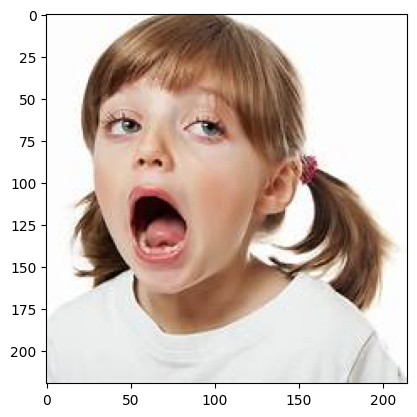

In [24]:

img = cv2.imread("pictures\mouth-opened1.jpg")
plt.imshow(img[:,:, ::-1])
plt.show()

[0.05470451389181402, 0.05067952856443717, 0.04433283870447603, 0.037728756712041636, 0.033665543474992614, 0.0351472882800768, 0.04012021938023866, 0.047052017155445144]
0.042928838270440264
[0.05627261869927394, 0.04814003793680354, 0.04074345529600168, 0.035161033424415566, 0.03332768452646885, 0.03731008347401909, 0.04452797339736006, 0.05154221811179055]
0.04337813810826666


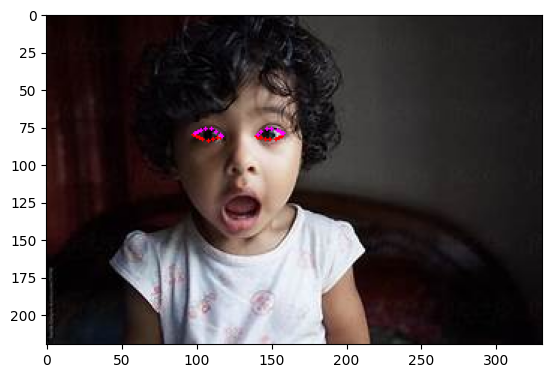

In [25]:
import cv2
import mediapipe as mp
import math
from dist_functions import *

# Initialize the MediaPipe FaceMesh solution
mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(static_image_mode=False, max_num_faces=1, min_detection_confidence=0.5, min_tracking_confidence=0.5)

# Load an image
image = cv2.imread('pictures\opened_mouth3.jpeg')  # Replace with the path to your image

# Process the image to find face landmarks
results = face_mesh.process(image)

if results.multi_face_landmarks:
    # Get the first detected face
    landmarks = results.multi_face_landmarks[0]

    # Create an empty image to draw only the mouth landmarks
    eye_image = image.copy()

    draw_indecies(landmarks,image,LEFT_EYE_UPPER,(0,0,255),eye_image)
    draw_indecies(landmarks,image,LEFT_EYE_LOWER,(255,0,255),eye_image)    
    draw_indecies(landmarks,image,RIGHT_EYE_UPPER,(0,0,255),eye_image)    
    draw_indecies(landmarks,image,RIGHT_EYE_LOWER,(255,0,255),eye_image)    
    
    left_dist, left_avrg = calculate_distances(landmarks, LEFT_EYE_UPPER ,LEFT_EYE_LOWER)
    right_dist,right_avrg= calculate_distances(landmarks, RIGHT_EYE_UPPER ,RIGHT_EYE_LOWER)
    
    print(left_dist)
    print(left_avrg)
    print(right_dist,)
    print(right_avrg)
   
    
    plt.imshow(eye_image[:,:, ::-1])
    plt.show()
    
# Release resources
face_mesh.close()


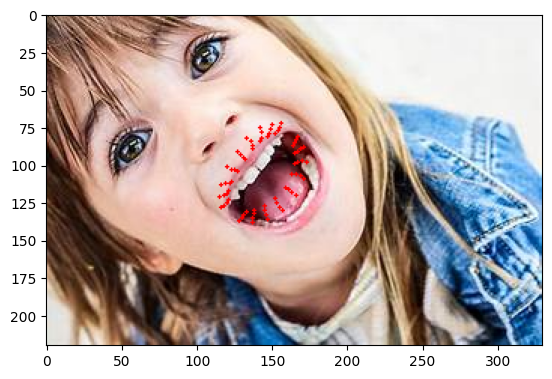

In [26]:
import cv2
import mediapipe as mp
import math

# Initialize the MediaPipe FaceMesh solution
mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(static_image_mode=False, max_num_faces=1, min_detection_confidence=0.5, min_tracking_confidence=0.5)

# Load an image
image = cv2.imread('pictures\opened_mouth2.jpeg')  # Replace with the path to your image

# Process the image to find face landmarks
results = face_mesh.process(image)

if results.multi_face_landmarks:
    # Get the first detected face
    landmarks = results.multi_face_landmarks[0]

    # Define the indices for the mouth landmarks (for a total of 20 landmarks)
    upper_lip_landmark_indices = [191, 183, 184, 185, 80, 42, 74, 40, 81, 41, 73, 39, 82, 38, 72, 37, 13, 12, 11, 0, 
                                 312, 268, 302, 267, 311, 271, 303, 269, 310, 272, 304, 270, 415, 407, 408, 409]
    lower_lip_landmark_indices= [95, 96, 77, 146, 88, 89, 90, 91, 178, 179, 180, 181, 87, 86, 85, 84, 14, 15, 16, 17
                                 ,317, 316, 315, 314, 402, 403, 404, 405, 318, 319, 320, 321, 324, 325, 307, 375]

    # Create an empty image to draw only the mouth landmarks
    mouth_image = image.copy()

    # Draw the mouth landmarks
    for idx in upper_lip_landmark_indices:
        landmark = landmarks.landmark[idx]
        height, width, _ = image.shape
        cx, cy = int(landmark.x * width), int(landmark.y * height)
        cv2.circle(mouth_image, (cx, cy), 1, (0, 0, 255), -1)
        # cv2.putText(mouth_image, str(idx), (cx, cy), cv2.FONT_HERSHEY_SIMPLEX, 0.3, (0, 0, 255), 1)
        
    # Display the image with only the mouth landmarks
    for idx in lower_lip_landmark_indices:
        landmark = landmarks.landmark[idx]
        height, width, _ = image.shape
        cx, cy = int(landmark.x * width), int(landmark.y * height)
        cv2.circle(mouth_image, (cx, cy), 1, (0, 0, 255), -1)
        
    # Calculate the distance between upper and lower lip landmarks
    upper_lip_points = [landmarks.landmark[idx] for idx in upper_lip_landmark_indices]
    lower_lip_points = [landmarks.landmark[idx] for idx in lower_lip_landmark_indices]
    
    # Calculate the Euclidean distance between corresponding points on the upper and lower lips
    distances = [math.dist((upper.x, upper.y), (lower.x, lower.y)) for upper, lower in zip(upper_lip_points, lower_lip_points)]
    average_distance = sum(distances) / len(distances)
    
    
    plt.imshow(mouth_image[:,:, ::-1])
    plt.show()
    
# Release resources
face_mesh.close()

In [29]:
from functions import *

cap = cv2.VideoCapture('videos/Untitled video - Made with Clipchamp (4).mp4')
frame_rate = int(cap.get(cv2.CAP_PROP_FPS))

frame_number = 0

# Define the threshold for determining an open mouth
mouth_open_threshold = 0.015

# Create variables to track mouth open/close state
mouth_open = False
mouth_open_start_frame = 0
total_mouth_open_time = 0
total_mouth_open_frames=0
local_mouth_open_time = 0
local_mouth_open_frames=0
is_mouth_open=False

# Initialize the MediaPipe FaceMesh solution
mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(static_image_mode=False, max_num_faces=1, min_detection_confidence=0.5, min_tracking_confidence=0.5)
draw = mp.solutions.drawing_utils

while cap.isOpened():
    
	ret, frame = cap.read()
	if not ret:
		break
	showed_image= frame	
	# Process the frame to find face landmarks
	results = face_mesh.process(frame)

	if results.multi_face_landmarks:
		landmarks = results.multi_face_landmarks[0]
		distances, average_distance = calculate_lip_distances(landmarks)
		write_distance_to_csv('output_files\distance', frame_number, distances, average_distance, is_mouth_open)

  		# draw.draw_landmarks(showed_image, landmarks, mp_face_mesh.FACEMESH_CONTOURS, landmark_drawing_spec=draw.DrawingSpec(color=(0, 255, 255), circle_radius=1))
		# plt.imshow(showed_image[:,:, ::-1])
		# plt.show()
		
  		# Determine if the mouth is open based on the average distance
		is_mouth_open = average_distance > mouth_open_threshold

  		# Calculate time for which the mouth is open
		if is_mouth_open:
			if not mouth_open:
				mouth_open_start_frame = frame_number
			mouth_open = True
			local_mouth_open_frames+=1
			local_mouth_open_time= (local_mouth_open_frames)/ (1.0*frame_rate)

		else:
			if mouth_open:
				total_mouth_open_time += local_mouth_open_time
				total_mouth_open_frames += local_mouth_open_frames
				local_mouth_open_time=0
				local_mouth_open_frames=0
			mouth_open = False
			

		write_time_to_csv('time',frame_number, is_mouth_open,local_mouth_open_time,local_mouth_open_frames,total_mouth_open_time, total_mouth_open_frames)

	frame_number+=1	
 
cap.release()
cv2.destroyAllWindows()

if mouth_open:
	total_mouth_open_time += local_mouth_open_time
	total_mouth_open_frames += local_mouth_open_frames
	local_mouth_open_time=0
	local_mouth_open_frames=0
mouth_open = False
write_time_to_csv('output_files\time',frame_number, is_mouth_open,local_mouth_open_time,local_mouth_open_frames,total_mouth_open_time, total_mouth_open_frames)
 